In [2]:
import sys
sys.path.insert(0, '..')
from qoop.compilation.qcompilation import QuantumCompilation
from qoop.core import ansatz, state
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import qiskit
from qiskit.primitives import Sampler
import time
import qiskit.quantum_info as qi

num_qubits = 2
random = np.random.uniform(0, np.pi, 2**num_qubits)
random = random/np.linalg.norm(random)
# random_array = 1/np.sqrt(3)*np.array([1,1,0,1])
random_array = np.array(random)
begin = time.time()
qc1 = state.specific(random_array)
qc = qiskit.QuantumCircuit(num_qubits)
qc.h(0)
qc.cx(0, 1)
phi_theta = qi.Statevector.from_instruction(qc).data
qc = qc.compose(qc1.inverse())

print(qc.draw())
operator = qi.DensityMatrix(qc).data
result = np.real(operator[0][0])
print("True (theory): ", result)
print("Test: ", np.real(np.dot(np.conj(random_array), phi_theta))**2)

     ┌───┐     ┌──────────────────────────────────────────────────────────┐
q_0: ┤ H ├──■──┤0                                                         ├
     └───┘┌─┴─┐│  State Preparation Dg(0.13728,0.68468,0.0091597,0.71574) │
q_1: ─────┤ X ├┤1                                                         ├
          └───┘└──────────────────────────────────────────────────────────┘
True (theory):  0.3638183314241139
Test:  0.36381833142411363


/Users/vutuanhai/Documents/GitHub/ucvqa/codes/../qsee/core/state.py:273: UserWarning: The input state is not normalized, we will normalize it for you
  warnings.warn("The input state is not normalized, we will normalize it for you")


# Normal fit() method

In [7]:
from qsee.backend import constant
num_qubits = 3
num_layers = 1
optimizer = 'adam'
random = np.random.uniform(-np.pi, np.pi, 2**num_qubits)
# random = 1/np.sqrt(2)*np.array([1,0,0,0,0,0,0,1])
random = (random/np.linalg.norm(random))
compiler = QuantumCompilation(
    u = ansatz.g2gn(num_qubits, 2),
    vdagger = state.specific(random).inverse(),
    optimizer = optimizer,
    metrics_func = ['loss_basic']
)
compiler.fit(10, verbose = 2)

Step 0 ...


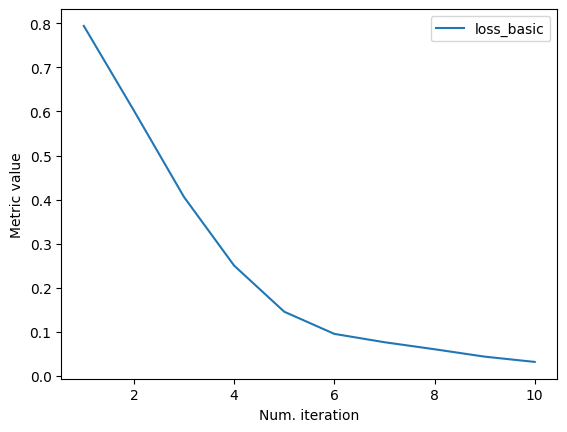

In [8]:
compiler.plot()

In [9]:
from qsee.backend import constant
num_qubits = 3
num_layers = 1
optimizer = 'adam'
random = np.random.uniform(-np.pi, np.pi, 2**num_qubits)
# random = 1/np.sqrt(2)*np.array([1,0,0,0,0,0,0,1])
random = (random/np.linalg.norm(random))
compiler = QuantumCompilation(
    u = ansatz.g2gn(num_qubits, 2),
    vdagger = state.specific(random).inverse(),
    optimizer = optimizer,
    metrics_func = ['loss_basic']
)
compiler.fast_fit(10, verbose = 2)

Step 0 ...


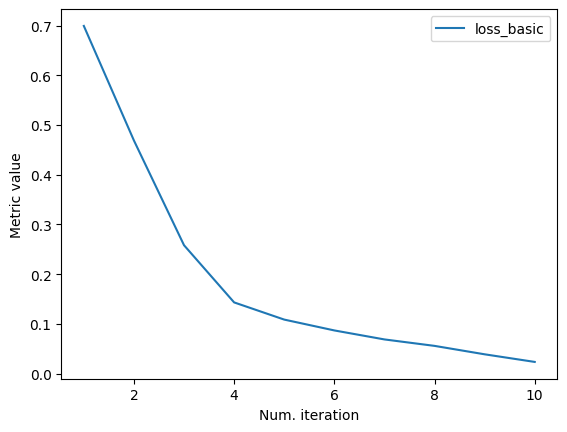

In [10]:
compiler.plot()

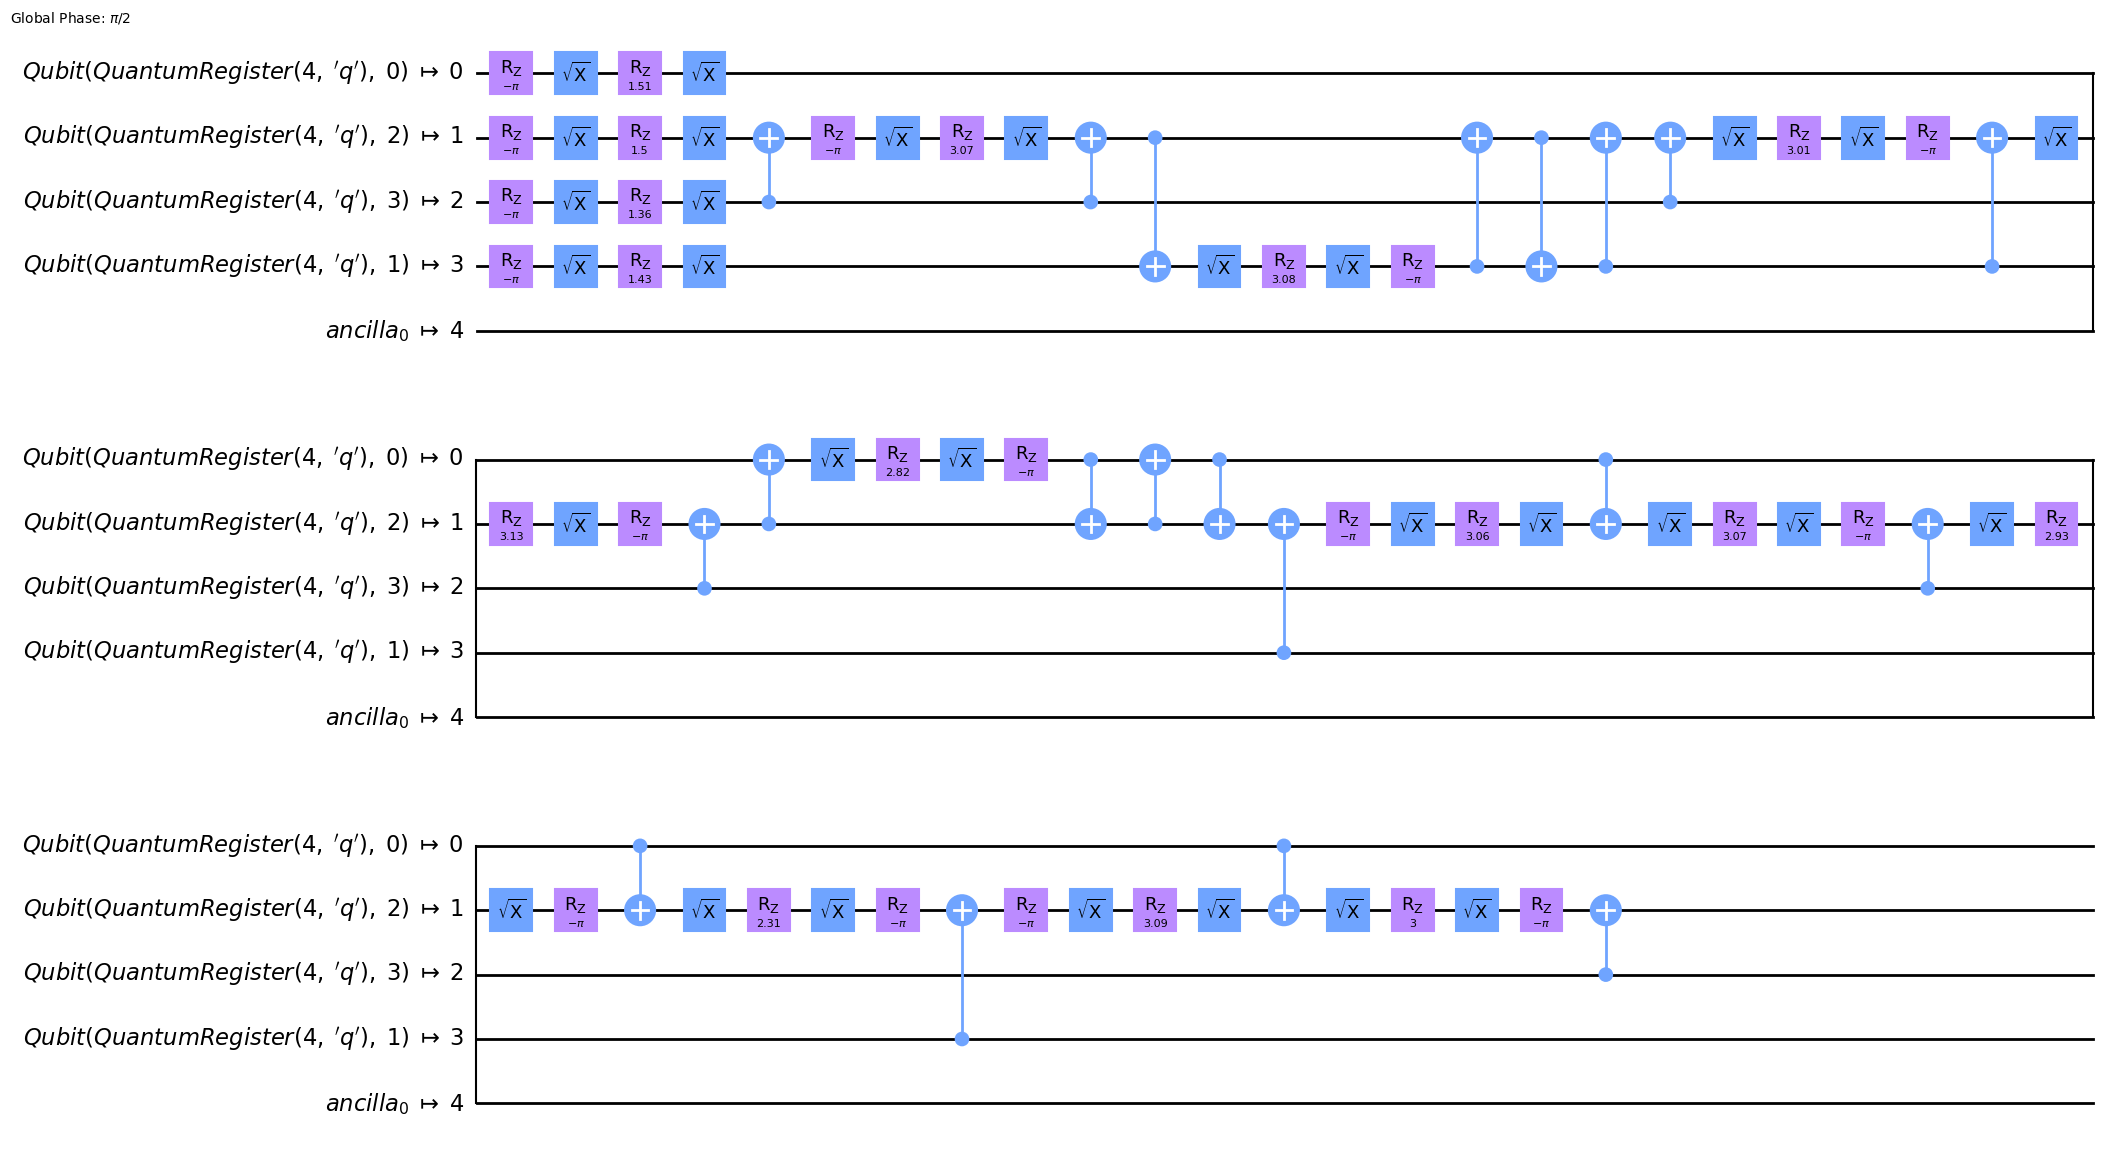

In [26]:
import qiskit
from qiskit.providers.fake_provider import FakeVigoV2

backend = FakeVigoV2()
qc_basis = qiskit.transpile(state.specific(target_state), backend)
qc_basis.draw(output='mpl')